# JOB POSTING KEY WORDS FINDER

## This program finds the keywords for the job posting. 

### If you are interested in Industry specific job posting, 
> #### 1. Set extract = " "
> #### 2. In the file of Job Description, Enter job description of atleast 10 jobs (the more the better) 

### If you are interested in Technical or Soft skills key words for the job posting,
> #### Enter "tech" for Technical and "soft" for Soft skills

## • • • Enter Job Title here • • • 

In [1]:
JobTitle = 'Data Scientist'

## • • • Enter the type of skills you want to extract • • • 

#### Enter "tech" for Technical and "soft" for Soft skills here

In [2]:
extract = "tech"
#extract = "soft"
#extract = " "

## • • • This Section is for the job specific skills to add • • • 

For example, Here Skills are shown for the IT industry (Specifically, Data Science/Data Analyst positions)

In [3]:
Popular_Job_Specific_Skills_tech = ['python', 'r', 'nlp', 'nltk' ,'pytorch', 'sql', 'ml', 'al', 'vision', 'cloud', 'scikit-learn', 'Tensorflow', 'software', 'machine', 'statistic', 'mathematics', 'algorithm', 'spark', 'java', 'tableau', 'database', 'hadoop', 'scala', 'hive', 'neural', 'deep', 'javascript', 'aws', 'scikit', 'bi', 'panda', 'excel', 'linux', 'pig', 'etl', 'matlab', 'nosql', 'agile', 's3', 'mysql', 'numpy', 'matplotlib', 'mongodb', 'azure', 'ec2', 'hive']

Popular_Job_Specific_Skills_soft = ['storytelling', 'analysis', 'problem-solving', 'solving', 'thinking', 'initiative', 'detail', 'team', 'smart', 'communication', 'visualization']

## • • • This Section is to scale specific skills from the Job_Specific_Skills parameter • • •

### Must be integer

### Try value between 1 to 4. Above it, will provide no proper result

In [4]:
scaling_parameter = 3

## Install library

In [5]:
#!pip install NLTK
#!pip install WordCloud

### Importing Required Libraries

In [6]:
import nltk
import string
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### Read the Job Description

In [7]:
with open("Job Description.txt", 'r') as jobDes:  
    rawdata = jobDes.read()

## Converting all text to Lower case

In [8]:
rawdata = rawdata.lower()
#rawdata

## Import Stopwords

In [9]:
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')


### Adding Extra words stopwords (General Words, which have high frequency in job postings)

In [10]:
stopwords = stopwords+["tools","system", "skills", "work", "working", "analytic", "ability", "model", "plus","technologies", "business", "etc", "advanced", "strong","knowledge"]

## Token Generation Function

In [11]:
def token(rawdata):
    text = re.split('\W+', rawdata)
    return text

## Remove Stopwords Function

In [12]:
def clean_text(rawdata):
    text = [word for word in rawdata if word not in stopwords]   # Remove stopwords
    return text

## Lemmatizer (Choosing the Root word based on dictionary) Function

In [13]:
lemmatizer = nltk.WordNetLemmatizer()
def lemmatize_text(text):
    lemmatize_tex = [lemmatizer.lemmatize(word) for word in text]
    return lemmatize_tex

## Stemming (Choosing the simmilar word starting) Function


In [14]:
ps = nltk.PorterStemmer()
def stemming_text(text):
    stemming_text = [ps.stem(word) for word in text]
    return stemming_text

## Job Specific **TECHNICAL SKILLS** Function

In [15]:
def tech_skills(data):
    temp_list = []
    global Popular_Job_Specific_Skills_tech
    global scaling_parameter
    for word in rawdata:
        if word in Popular_Job_Specific_Skills_tech:
            #print("====" + word)
            temp_list.append(word)
    temp_list = data + scaling_parameter * temp_list
    return temp_list

## Job Specific **SOFT SKILLS** Function

In [16]:
def soft_skills(data):
    temp_list = []
    global Popular_Job_Specific_Skills_soft
    global scaling_parameter
    for word in rawdata:
        if word in Popular_Job_Specific_Skills_soft:
            #print("====" + word)
            temp_list.append(word)
    temp_list = data + scaling_parameter * temp_list
    return temp_list

## Token Generate

In [17]:
rawdata = token(rawdata)
#rawdata

## Extract Tech or Soft Skills, If required

In [18]:
if (extract == 'soft'):
    rawdata = soft_skills(rawdata)
elif(extract == 'tech'):
    rawdata = tech_skills(rawdata)        

## Job title Weightage

In [19]:
rawdata_title = JobTitle.lower()
rawdata_title = token(rawdata_title)
rawdata_title

['data', 'scientist']

### Giving Weightage of 2 words to Job Title 

In [20]:
rawdata = rawdata + rawdata_title
rawdata = rawdata + rawdata_title

In [21]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
clean_rawdata = clean_text(rawdata)

### Call Stemmer (Not required for DATA or Software related jobs, as most of the words starts with simmilar letters)

In [23]:
# st_data = stemming_text(clean_rawdata)
# rawdata = st_data

### Call Lemmetizer

In [24]:
lm_data = lemmatize_text(clean_rawdata)
rawdata = lm_data
#rawdata

## To Count the frequency of each word (For Refrence only)

In [25]:
import pandas as pd
df = pd.DataFrame(rawdata) 
list_of_words = df[0].value_counts()

In [26]:
df = pd.DataFrame(list_of_words)

In [27]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

print_full(df)


                 0
data            17
experience       9
management       4
r                4
mathematics      4
python           4
matlab           4
process          3
multiple         3
statistical      2
source           2
using            2
level            2
use              2
practice         2
integrity        2
stakeholder      2
scientist        2
project          2
sa               2
analysis         2
focus            2
governance       2
requirement      2
quality          2
complex          2
science          2
influence        1
warehousing      1
develop          1
case             1
title            1
scienti          1
solve            1
quantitative     1
industry         1
example          1
issue            1
dynamic          1
internet         1
department       1
supply           1
job              1
field            1
identify         1
similar          1
m                1
insight          1
education        1
recommend        1
provide          1
customer    

## Detokenizer (To remove '' '' from the wordcloud plot)

In [28]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
rawdata = TreebankWordDetokenizer().detokenize(rawdata)

## WordCloud

In [29]:
wordcloud = WordCloud(stopwords=stopwords, max_words=25, \
                      background_color="white").generate(str(rawdata))


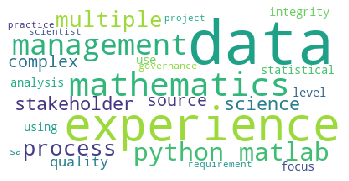

<Figure size 1080x720 with 0 Axes>

In [30]:
plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=(15,10))
plt.show()

## Still need to remove words?

### • • • Enter here in the list • • • 

In [31]:
stopwords += ["Enter the list here"] 

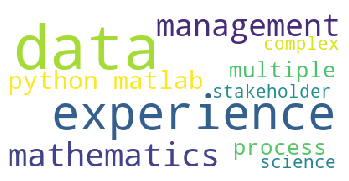

<Figure size 1080x720 with 0 Axes>

In [32]:
wordcloud = WordCloud(stopwords=stopwords, max_words=10, \
                      background_color="white").generate(rawdata)

plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=(15,10))
plt.show()